In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-train/sample_submission.csv
/kaggle/input/amazon-train/delivery time.csv
/kaggle/input/amazon-train/delivery time Test.csv


In [2]:
import pandas as pd

sample_submission_path = '/kaggle/input/amazon-train/sample_submission.csv'
delivery_time_path = '/kaggle/input/amazon-train/delivery time.csv'
delivery_time_test_path = '/kaggle/input/amazon-train/delivery time Test.csv'

sample_submission_df = pd.read_csv(sample_submission_path)
delivery_time_df = pd.read_csv(delivery_time_path)
delivery_time_test_df = pd.read_csv(delivery_time_test_path)

print("Sample Submission DataFrame shape:", sample_submission_df.shape)
print("Delivery Time DataFrame shape:", delivery_time_df.shape)
print("Delivery Time Test DataFrame shape:", delivery_time_test_df.shape)

Sample Submission DataFrame shape: (5, 2)
Delivery Time DataFrame shape: (45593, 21)
Delivery Time Test DataFrame shape: (11399, 19)


In [3]:
delivery_time_df.head()

,Source.Name.1,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,39,0x3b07,SURRES06DEL03,28.0,4.7,21.185047,72.808590,21.245047,72.868590,11-03-2022,...,23:45,Cloudy,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,24.0
1,77,0x8b41,PUNERES16DEL02,38.0,4.7,18.536718,73.830327,18.556718,73.850327,30-03-2022,...,10:40,Sunny,Low,0,Meal,motorcycle,1.0,No,Metropolitian,20.0
2,103,0xa200,SURRES07DEL01,30.0,4.7,21.170798,72.790489,21.280798,72.900489,29-03-2022,...,22:30,Windy,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,24.0
3,203,0x62a1,PUNERES17DEL01,34.0,4.7,18.530963,73.828972,18.600963,73.898972,08-03-2022,...,23:30,Fog,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,39.0
4,252,0x3c72,VADRES05DEL02,31.0,4.7,22.310526,73.170937,22.390526,73.250937,20-03-2022,...,23:30,Fog,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,41.0


In [4]:
delivery_time_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Source.Name.1                45593 non-null  int64  
 1   ID                           45593 non-null  object 
 2   Delivery_person_ID           45593 non-null  object 
 3   Delivery_person_Age          43739 non-null  float64
 4   Delivery_person_Ratings      43685 non-null  float64
 5   Restaurant_latitude          45593 non-null  float64
 6   Restaurant_longitude         45593 non-null  float64
 7   Delivery_location_latitude   45593 non-null  float64
 8   Delivery_location_longitude  45593 non-null  float64
 9   Order_Date                   45593 non-null  object 
 10  Time_Orderd                  43862 non-null  object 
 11  Time_Order_picked            45593 non-null  object 
 12  Weather conditions           44977 non-null  object 
 13  Road_traffic_den

In [5]:

# Select columns with missing values
columns_with_missing_values = delivery_time_df.columns[delivery_time_df.isnull().any()]

# Drop rows with missing values in the selected columns
delivery_time_df.dropna(subset=columns_with_missing_values, inplace=True)

# Check the DataFrame information after dropping rows
print(delivery_time_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 41368 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Source.Name.1                41368 non-null  int64  
 1   ID                           41368 non-null  object 
 2   Delivery_person_ID           41368 non-null  object 
 3   Delivery_person_Age          41368 non-null  float64
 4   Delivery_person_Ratings      41368 non-null  float64
 5   Restaurant_latitude          41368 non-null  float64
 6   Restaurant_longitude         41368 non-null  float64
 7   Delivery_location_latitude   41368 non-null  float64
 8   Delivery_location_longitude  41368 non-null  float64
 9   Order_Date                   41368 non-null  object 
 10  Time_Orderd                  41368 non-null  object 
 11  Time_Order_picked            41368 non-null  object 
 12  Weather conditions           41368 non-null  object 
 13  Road_traffic_density 

In [6]:
# Drop non-numeric columns
numeric_df = delivery_time_df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()


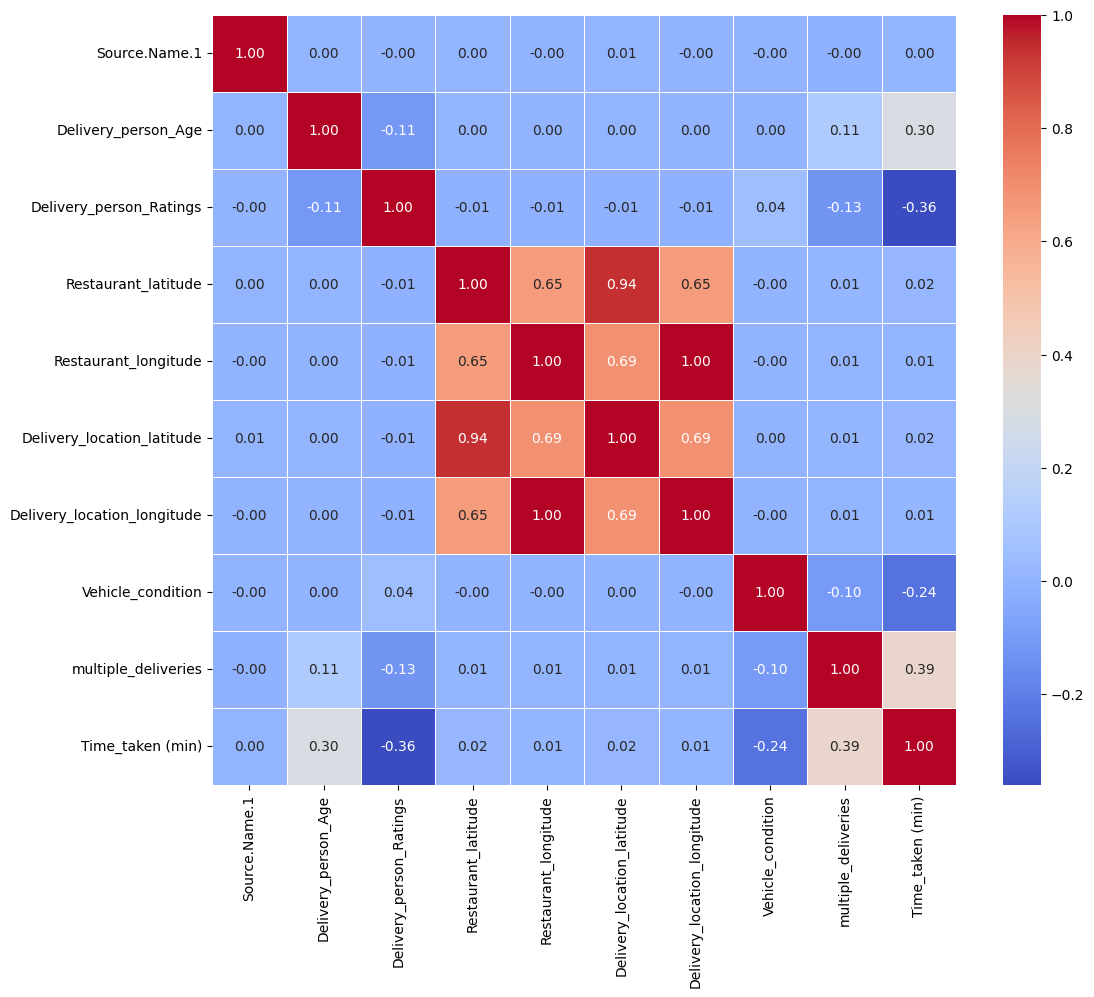

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Step 1: Data Preprocessing
# Assuming 'numeric_df' is your DataFrame

# Handle missing values (if any)
numeric_df.fillna(0, inplace=True)

# Define features (X) and target variable (y)
X = numeric_df.drop('Time_taken (min)', axis=1)
y = numeric_df['Time_taken (min)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Scaling (Optional, depending on the model)

# Step 3: Model Selection
model = LinearRegression()

# Step 4: Model Training
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Step 6: Prediction (for new data)
# You can use the trained model to make predictions on new data
new_data = X_test.head(1)  # Example: Using the first row of the test set
prediction = model.predict(new_data)
print(f'Predicted Time_taken: {prediction[0]} minutes')


Mean Absolute Error: 5.712659031110171
Predicted Time_taken: 30.661847303374444 minutes


Mean Absolute Error (MAE):

The Mean Absolute Error is a metric that measures the average absolute difference between the actual and predicted values. It provides a measure of the average magnitude of errors in your predictions.
In your case, the MAE is approximately 5.71 minutes. This means, on average, your model's predictions are off by about 5.71 minutes from the actual delivery times.
Predicted Time_taken:

This value, 30.66 minutes, is an example prediction made by your model for a specific set of input features.
It indicates that, based on the features provided to the model, it predicts the delivery time to be approximately 30.66 minutes.

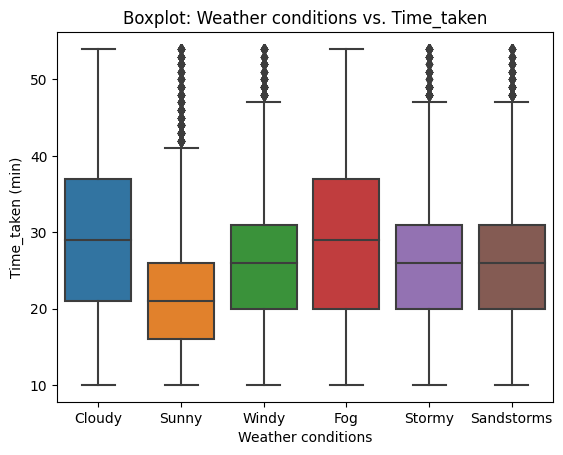

In [9]:
# Boxplot
sns.boxplot(x='Weather conditions', y='Time_taken (min)', data=delivery_time_df)
plt.title('Boxplot: Weather conditions vs. Time_taken')
plt.show()


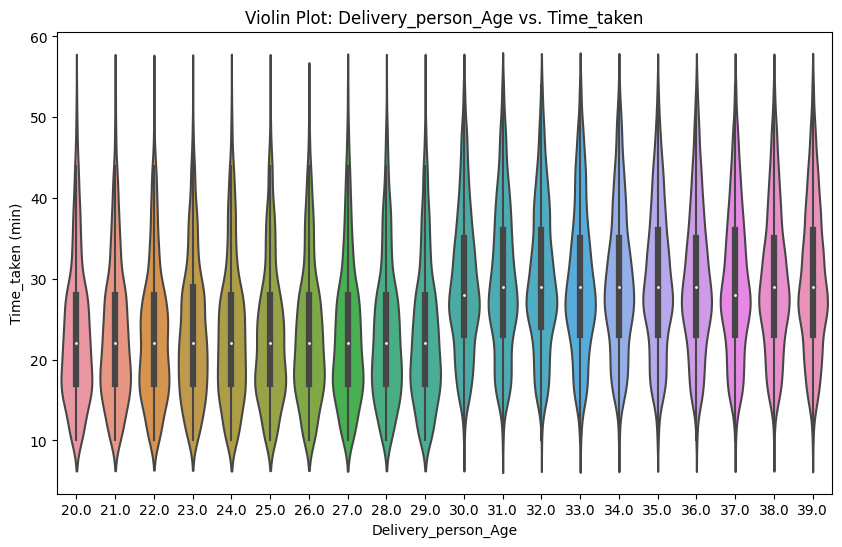

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x=numeric_df['Delivery_person_Age'], y=numeric_df['Time_taken (min)'])
plt.title('Violin Plot: Delivery_person_Age vs. Time_taken')
plt.xlabel('Delivery_person_Age')
plt.ylabel('Time_taken (min)')
plt.show()


In [11]:
# Assuming 'numeric_df' is your DataFrame

# Calculate the correlation between 'Delivery_person_Age' and 'Time_taken (min)'
correlation_age_time = numeric_df['Delivery_person_Age'].corr(numeric_df['Time_taken (min)'])

print(f"Correlation between Delivery_person_Age and Time_taken: {correlation_age_time}")


Correlation between Delivery_person_Age and Time_taken: 0.2972699498706194


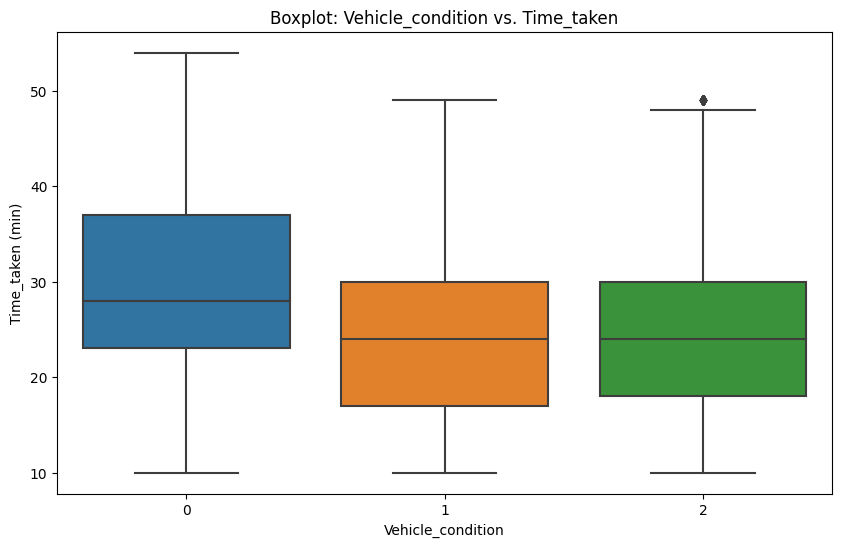

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=numeric_df['Vehicle_condition'], y=numeric_df['Time_taken (min)'])
plt.title('Boxplot: Vehicle_condition vs. Time_taken')
plt.xlabel('Vehicle_condition')
plt.ylabel('Time_taken (min)')
plt.show()
